# Data-Driven Innovation Challenge - Kaan G.

### Goal
The end goal of the project is for Brawlhalla-Players to improve. I want players to improve by finding their own matches back they played against me. Online, I have videos that are usually between 40 and 150 minutes long of playing matches against 5 to 50 opponents. 

### Exercise
The exercise is to build an AI which can exactly tell which players I faced in a video. Also would it be nice if it would include timestamps. Ideally we build this into a website (if i can find some free hosting)

Let's split the exercise up in smaller progressing parts.
- Extract the name of the enemy from an image
- Extract the name of the enemy from a video (add filler footage before and after the screen where the names are displayed)
- Extract the name of the enemy by providing a video URL (not necessary, huge quality of life upgrade)
- Include Timestamps
- Return a full output of the list

<h1 style="text-align:center;background-color:dimgrey;">Extract the name of the enemy from an Image</h1>

This is the screen where we should get the name enemy. The enemy is ALWAYS on the right side. So we only must get the name on the right side.<br>
In the red Rectangle you can see the name of the enemy `Kurisu Makise <3` that is our desired output for now.
<div style="width:800px;display:inline-block;">

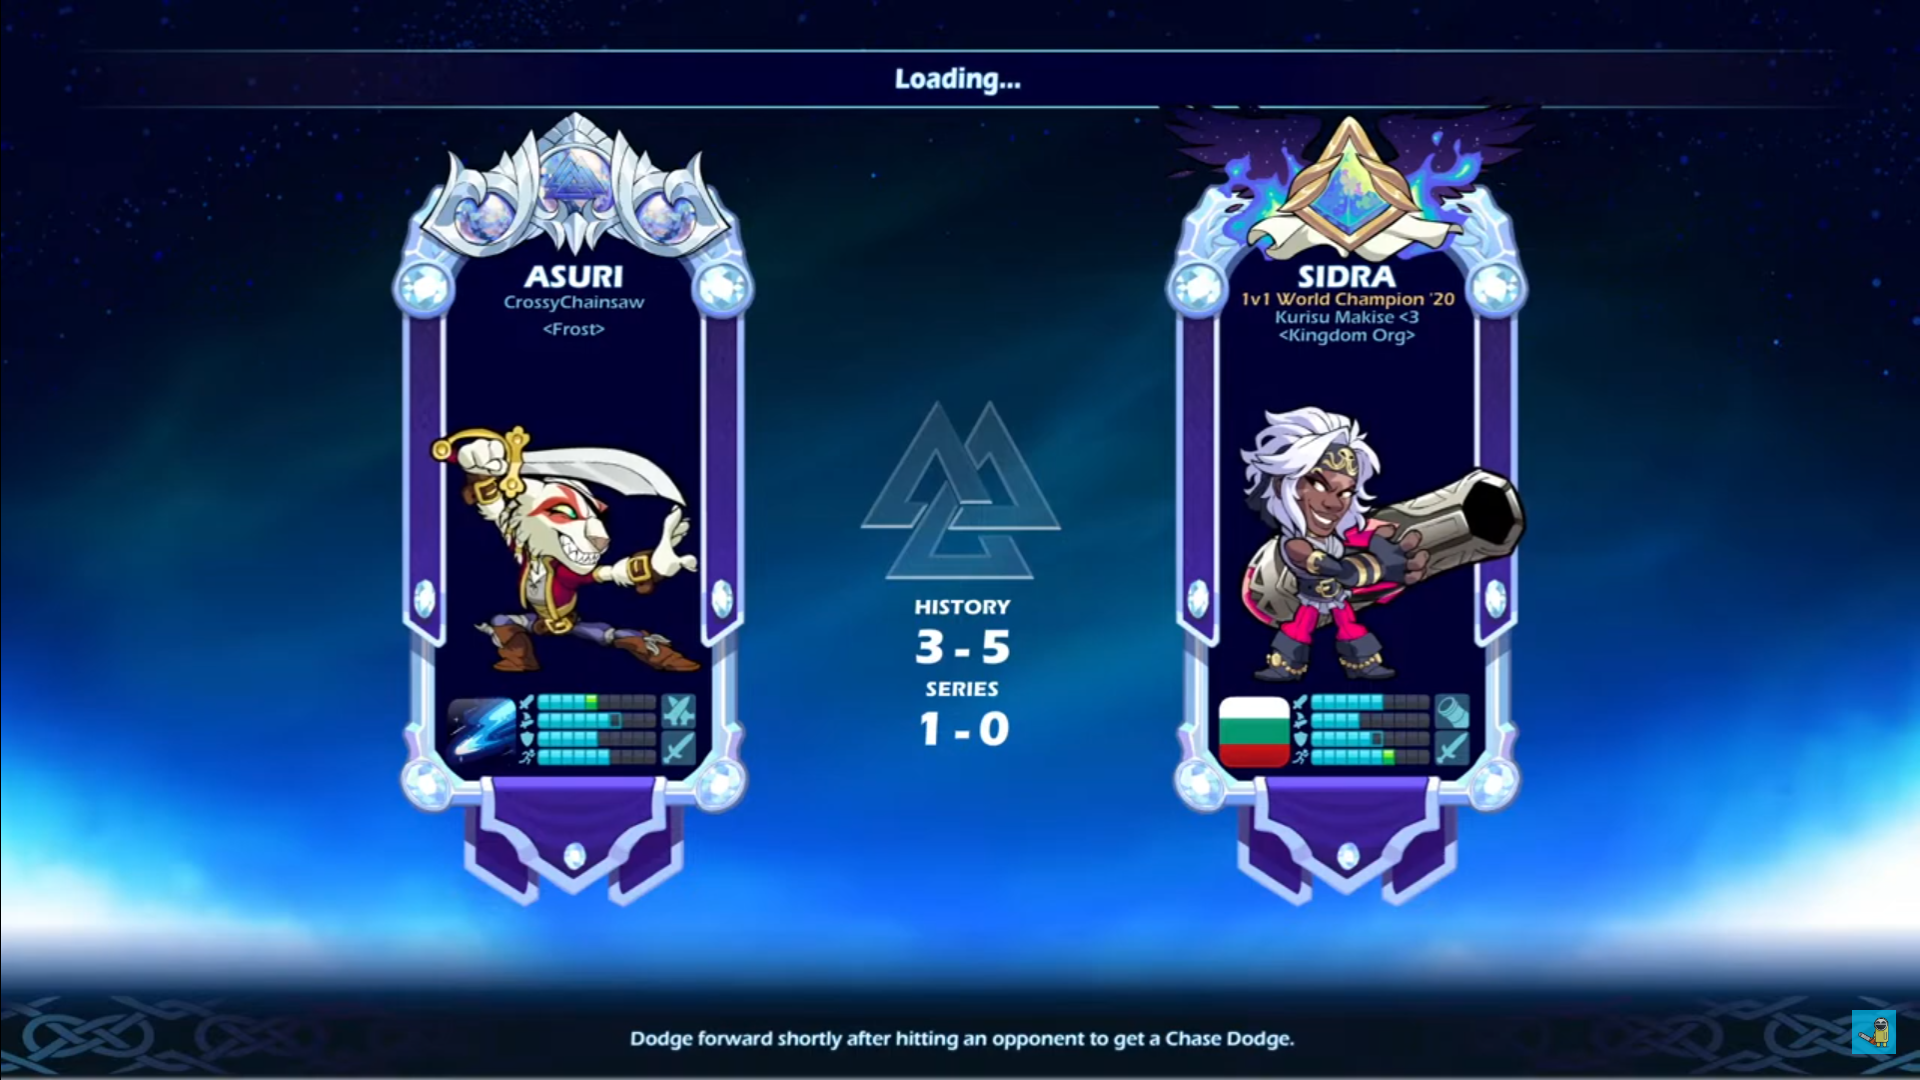

</div>

<div style="width:800px;display:inline-block;">

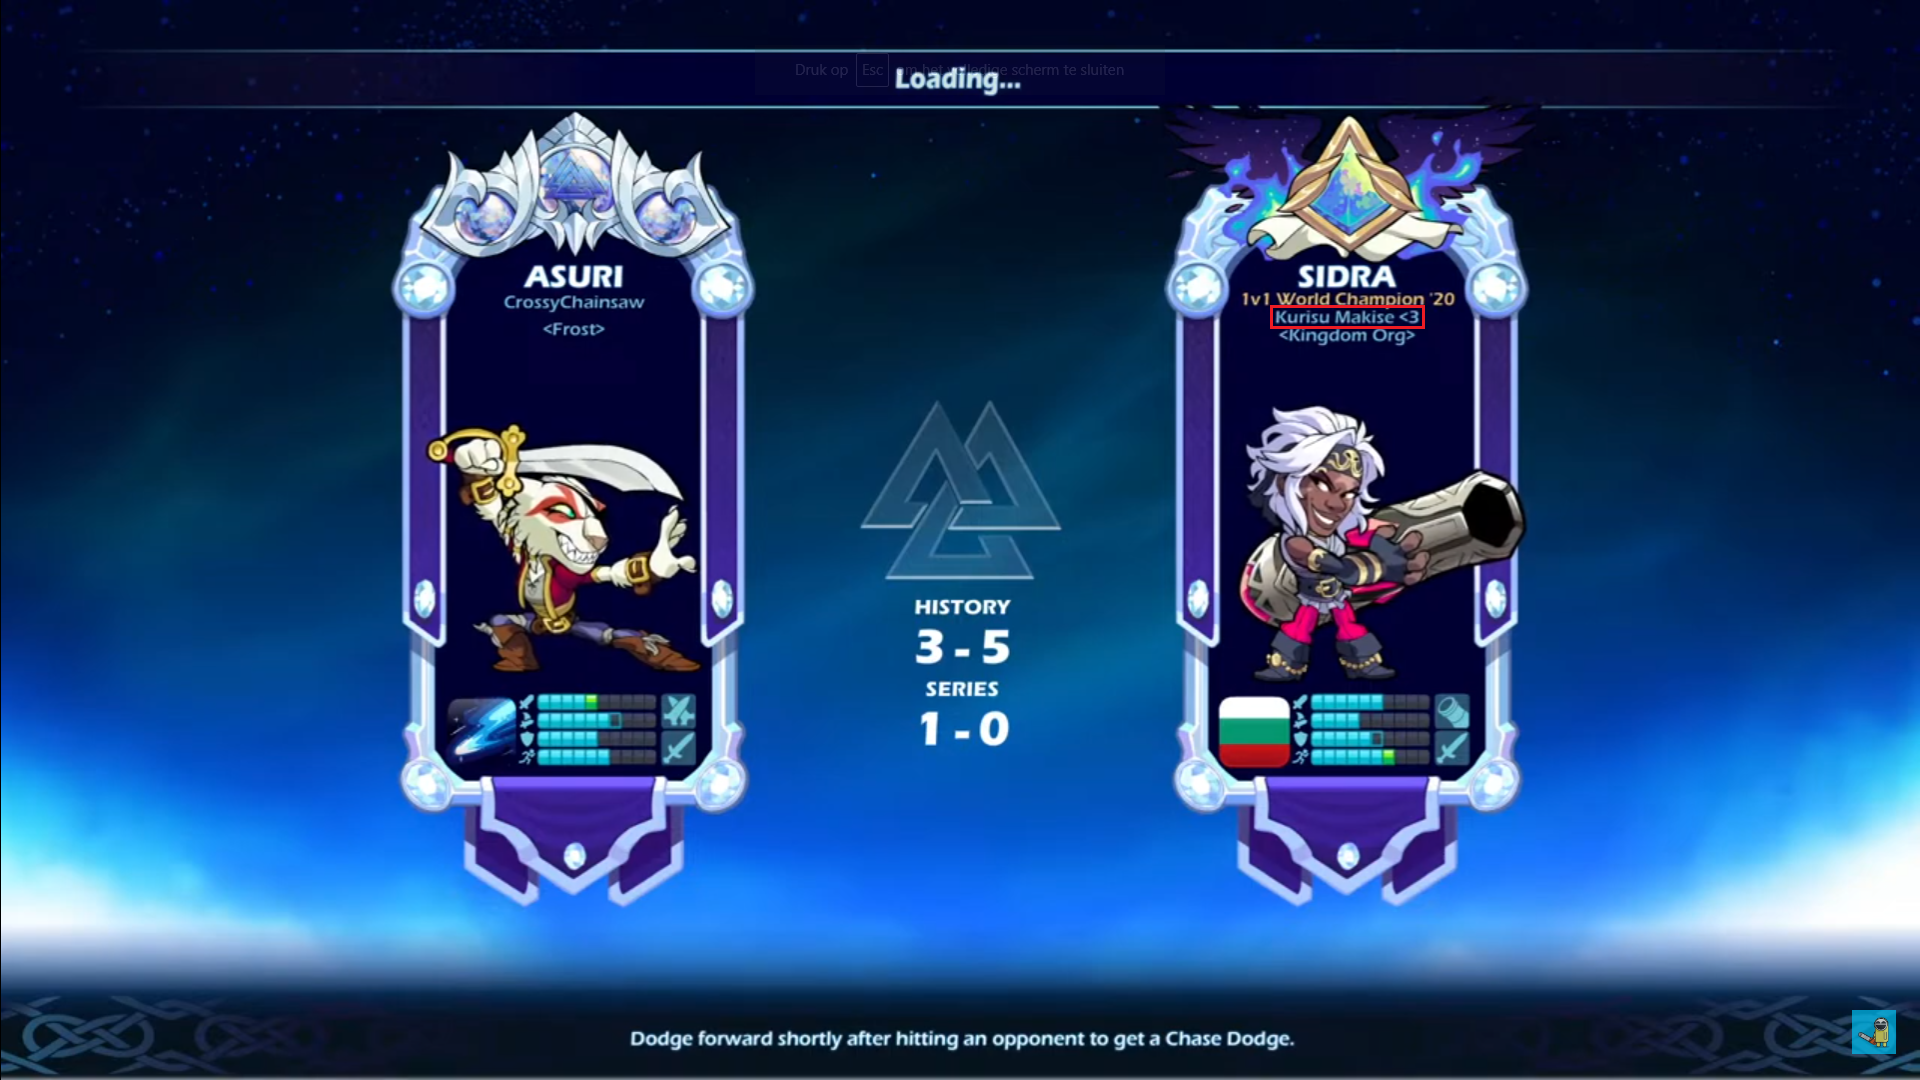

</div>

### Import Depencenies

In [7]:
import cv2 # 4.5.4
import easyocr # 1.6.2
import PIL # 9.5.0
import matplotlib.pyplot as plt
import keras_ocr # 0.9.2 (also wants tensorflow)

print(cv2.__version__)
print(easyocr.__version__)
print(PIL.__version__)
print(keras_ocr.__version__)


4.5.4
1.6.2
9.5.0
0.9.2


### Text Detector
To get more accurate results, its better if we only take a section from an image instead of the entire image<br>
In this section there are 3 text boxes present



<div style="width:200px;display:inline-block;">

- Title (Optional) ->
- Name (Required)  ->
- Clan (Optional)  ->

</div>

<div style="width:800px;display:inline-block;">

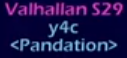

</div>

We want to extract the name.

Let's first try to Detect text from my image

In [11]:
#read image
image_path = "player_name_data/pavelski.png"
img = cv2.imread(image_path)

# instance text detector // Load model
# reader = easyocr.Reader(['en'], gpu=False, user_network_directory=".\\custom_model_2\\", recog_network="custom_example", model_storage_directory=".\\custom_model_2\\")
reader = easyocr.Reader(['en'], gpu=False)

# detect text
results = reader.readtext(img)

Using CPU. Note: This module is much faster with a GPU.


In [12]:
for r in results:
    print(r)

([[6, 0], [226, 0], [226, 25], [6, 25]], 'Ivl World Champion 20', 0.6831272276026932)
([[39, 19], [189, 19], [189, 39], [39, 39]], 'Kurisu Makisc <3', 0.8952933812232682)
([[43, 34], [187, 34], [187, 63], [43, 63]], '<Kingdom Org>', 0.682802887244397)


### Filter out filler data
Now we only want the name `y4c` and we want to filter out `Valhallan S29` and `<Pandation>`. To do that we basically need the second variable. We can do this by writing `results[1]`.

As you saw the Title and the Clan are both optional. This means there can be instances where there won't be 3 results. To deal with that we look at the priority the game provides for the order of Title, Name, Clan.

Yes Title, Yes Clan (no issue)
- Title
- Name
- Clan

Yes Title, No Clan (possibly issue)
- Title
- Name

No Title, Yes Clan (possible issue)
- Name
- Clan

No Title, No Clan (no issue)
- Name

For the first and last case, we can just ask how long the array of results is. but whenever the length of the array is 2, the position of name can be different. To figure out if name is on the first position, we can ask if the second position starts with `<` and ends with `>` since a clan always has these brackets areound them.

In [13]:
def get_name(results):
    if len(results) == 3:
        print(results[1])
    if len(results) == 2:
        # figure out if title or clan
        name = results[1][1]
        if (name[0:1] == "<") or (name[len(name)-1:len(name)] == ">"):
            print(results[0])
        else:
            print(results[1])
    if len(results) == 1:
        print(results[0])

get_name(results)

([[39, 19], [189, 19], [189, 39], [39, 39]], 'Kurisu Makisc <3', 0.8952933812232682)


https://github.com/JaidedAI/EasyOCR/blob/master/custom_model.md

The model I'm using misdetects an `e` for a `c`. This mistake is consistent. To fix this I will try to get a different model from the internet, hoping it will understand my font better.

### Load Model

In [14]:
#read image
image_path = "player_name_data/pavelski.png"
img = cv2.imread(image_path)

# instance text detector // Load model
reader = easyocr.Reader(['en'], gpu=False, user_network_directory=".\\models\\custom_model_1\\", recog_network="custom_example", model_storage_directory=".\\models\\custom_model_1\\")

# detect text
results = reader.readtext(img)

Using CPU. Note: This module is much faster with a GPU.


In [21]:
for r in results:
    print(r)

([[6, 0], [226, 0], [226, 25], [6, 25]], 'Ivl World Champion 20', 0.6831272276026932)
([[39, 19], [189, 19], [189, 39], [39, 39]], 'Kurisu Makisc <3', 0.8952933812232682)
([[43, 34], [187, 34], [187, 63], [43, 63]], '<Kingdom Org>', 0.682802887244397)


The model only became worse, making more mistakes.

## Training my own Text-Recognition-Model

check `./train_ocr_model.ipynb` for training the model